In [1]:
import numpy as np
import cvxpy as cp
import scipy.io
import matplotlib.pyplot as plt

## Problem 1 A

In [2]:
data_train = scipy.io.loadmat("separable_case/train_separable.mat")
data_test = scipy.io.loadmat("separable_case/test_separable.mat")

In [3]:
A = data_train["A"]
B = data_train["B"]

test = data_test["X_test"]
test_label = data_test["true_labels"].ravel()

In [43]:
n = 100 # convex combination of 100 data points

u = cp.Variable((n, 1))
v = cp.Variable((n, 1))
ones = np.ones((1,100))

prob = cp.Problem(cp.Minimize( cp.square(cp.norm(cp.matmul(A,u)-cp.matmul(B,v))) ),
                 [
                     cp.matmul(ones, u)==1,
                     cp.matmul(ones, v)==1,
                     u >= 0,
                     v >= 0
                 ])

In [49]:
prob.solve(solver="MOSEK", verbose=True)
print("The optimal value is", prob.value)
u_opt = u.value
v_opt = v.value

A_opt = np.matmul(A, u_opt)
B_opt = np.matmul(B, v_opt)

gamma = 0.5*(np.linalg.norm(A_opt)**2-np.linalg.norm(B_opt)**2)
normal_vector = A_opt - B_opt
normal_vector = normal_vector

The optimal value is 80.01935262277964


In [45]:
sum(np.square(np.matmul(A, u_opt)-np.matmul(A, v_opt)))

array([8.983833])

In [24]:
x_lin = np.linspace(-5, 5, 500)
y_lin = (-x_lin*normal_vector[0][0] + gamma)/normal_vector[1][0]

In [25]:
# prediction
preds = np.matmul(test.T, normal_vector) - gamma
preds = np.array([1 if p > 0 else -1 for p in preds])

# calculate accuracy
true_pred = preds == test_label
acc = sum(true_pred)/len(true_pred)
print("accuracy = {:.2f}".format(acc))

accuracy = 1.00


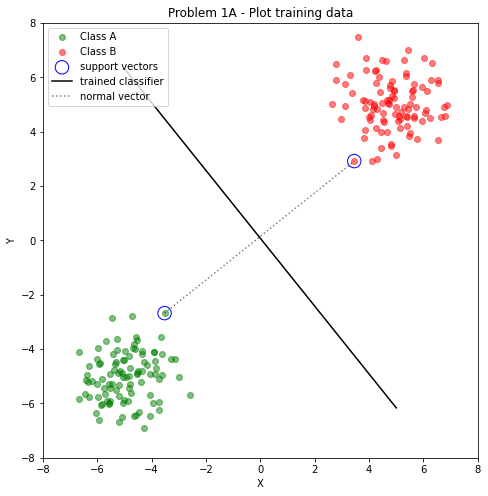

In [26]:
fig = plt.figure(figsize=(8,8))
plt.scatter(A[0,:],A[1,:], alpha=0.5, color='g', label='Class A')
plt.scatter(B[0,:],B[1,:], alpha=0.5, color='r', label='Class B')

# plot optimal point
plt.scatter(A_opt[0], A_opt[1], alpha=1, s=180, facecolors='none', edgecolors='b', label='support vectors')
plt.scatter(B_opt[0], B_opt[1], alpha=1, s=180, facecolors='none', edgecolors='b')

# plot hyperplane
plt.plot(x_lin, y_lin, label='trained classifier', color='black')
plt.plot([A_opt[0], B_opt[0]], [A_opt[1], B_opt[1]], alpha=0.5, ls="dotted", label='normal vector', color='black')

plt.title("Problem 1A - Plot training data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="upper left")
ax = plt.gca()
ax.set_aspect('equal')
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

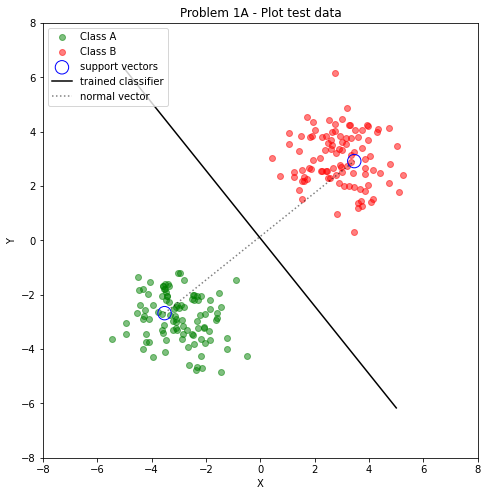

In [27]:
fig = plt.figure(figsize=(8,8))

plt.scatter(test[:,test_label==1][0,:],test[:,test_label==1][1,:], alpha=0.5, color='g', label='Class A')
plt.scatter(test[:,test_label==-1][0,:],test[:,test_label==-1][1,:], alpha=0.5, color='r', label='Class B')

# plot optimal point
plt.scatter(A_opt[0], A_opt[1], alpha=1, s=180, facecolors='none', edgecolors='b', label='support vectors')
plt.scatter(B_opt[0], B_opt[1], alpha=1, s=180, facecolors='none', edgecolors='b')

# plot hyperplane
plt.plot(x_lin, y_lin, label='trained classifier', color='black')
plt.plot([A_opt[0], B_opt[0]], [A_opt[1], B_opt[1]], alpha=0.5, ls="dotted", label='normal vector', color='black')

plt.title("Problem 1A - Plot test data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="upper left")
ax = plt.gca()
ax.set_aspect('equal')
plt.xlim(-8, 8 )
plt.ylim(-8, 8 )
plt.show()